In [2]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
csv_path = '2019.csv'
df = pd.read_csv(csv_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [5]:
df.describe()

Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000   
25%                   0.547750                      0.308000    0.108750   
50%                   0.789000                      0.417000    0.177500   
75%                   0.881750                      0.507250    0.248250   
max                   1.141000                      0.631000    0.566000   

       Perceptions of corruption  
count                 156.000000  
mean                    0.110603  
std                     0.094538  
min                     0.000000  
25%                     0.047000  
50%                     0.085500  
75%                     0.141250  
max                     0.453000

In [6]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [7]:
df.duplicated().sum()

0

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


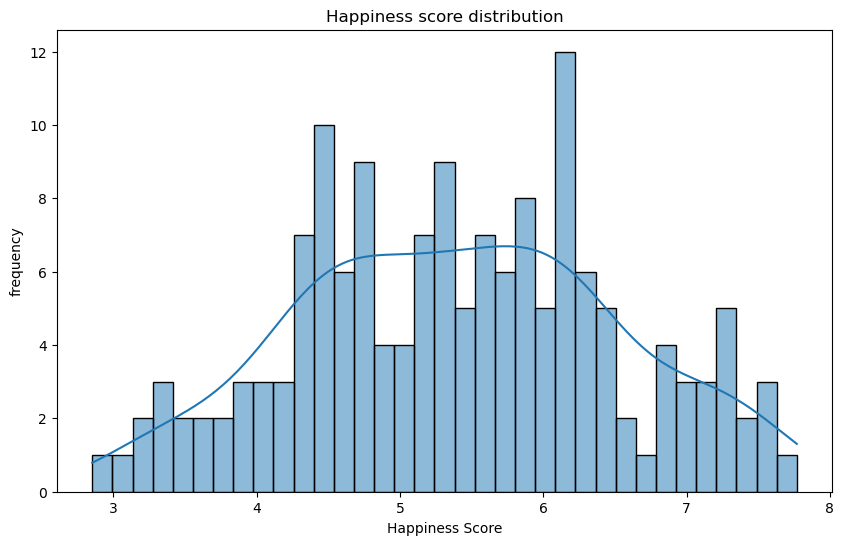

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Score'], bins=35, kde=True)
plt.title('Happiness score distribution')
plt.xlabel('Happiness Score')
plt.ylabel('frequency')
plt.show()

In [9]:
df_filter_high = df.sort_values(by='Score',ascending=False)
df_filter_high = df_filter_high.iloc[0:5]

In [10]:
df_filter_low = df.sort_values(by='Score',ascending=True)
df_filter_low = df_filter_low.iloc[0:5]

Text(0, 0.5, 'Happiness Score')

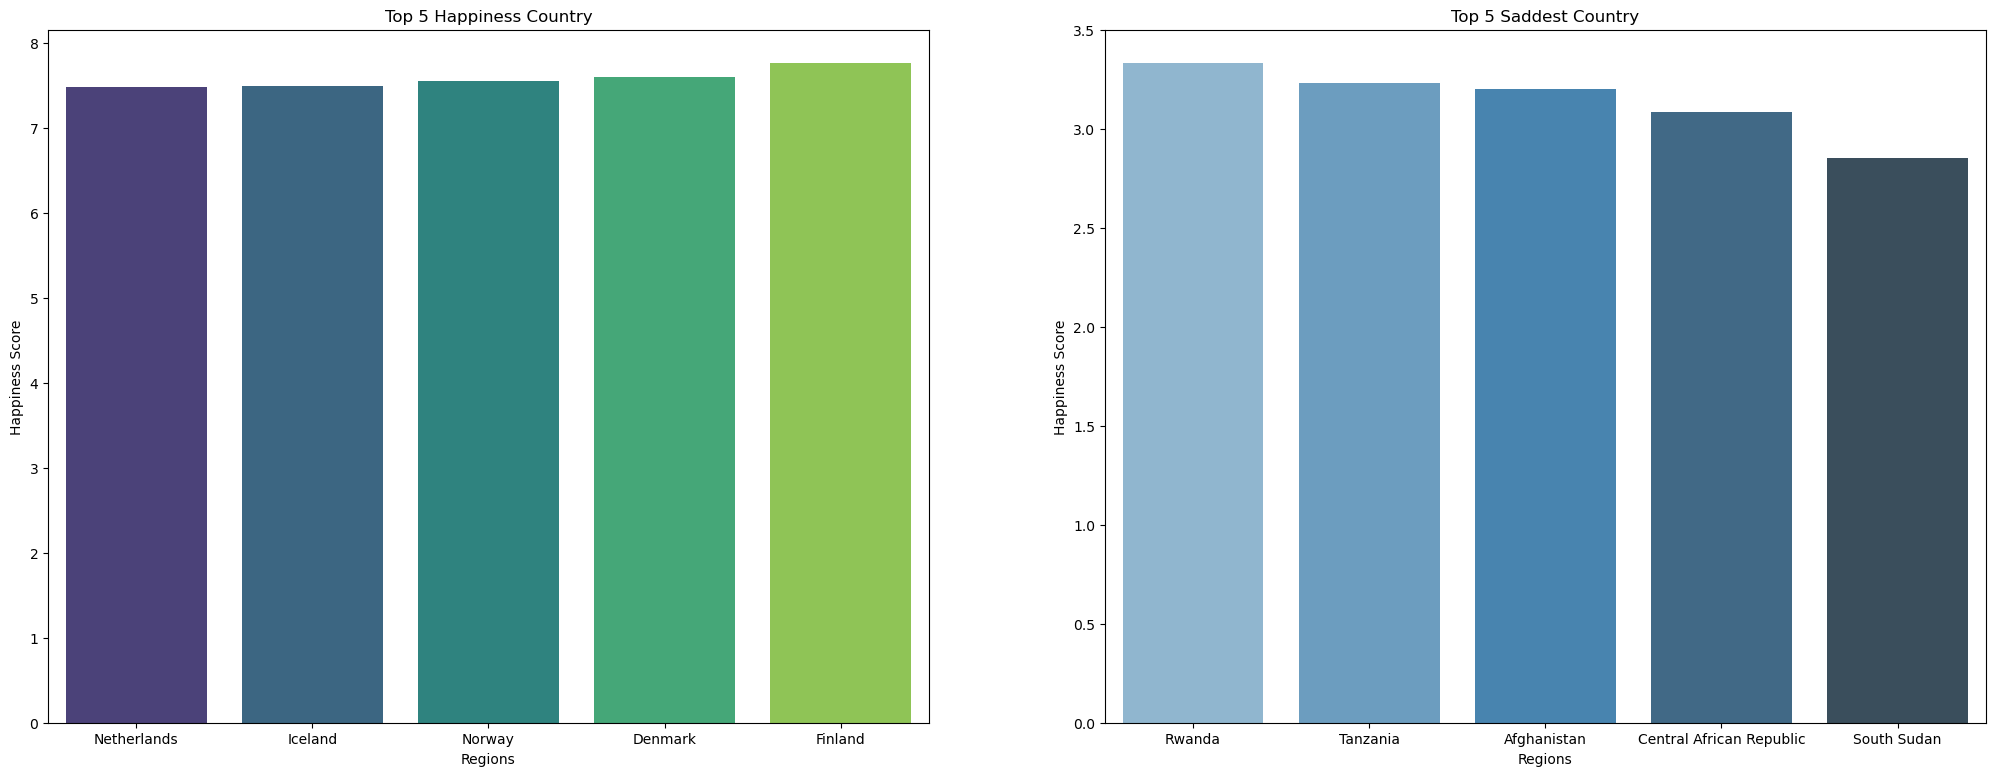

In [11]:
fig,axs = plt.subplots(1,2,figsize=(25,9))
sns.barplot(y='Score', x='Country or region',data=df_filter_high.sort_values(by='Score',ascending=True),palette='viridis',ax = axs[0])
axs[0].set_title('Top 5 Happiness Country')
axs[0].set_xlabel('Regions')
axs[0].set_ylabel('Happiness Score')
sns.barplot(y='Score', x='Country or region',data=df_filter_low.sort_values(by='Score',ascending=False),palette='Blues_d',ax = axs[1])
axs[1].set_title('Top 5 Saddest Country')
axs[1].set_xlabel('Regions')
axs[1].set_ylabel('Happiness Score')

In [12]:
filter_df = df[(df['Country or region'] == 'Finland') | (df['Country or region'] == 'South Sudan')]

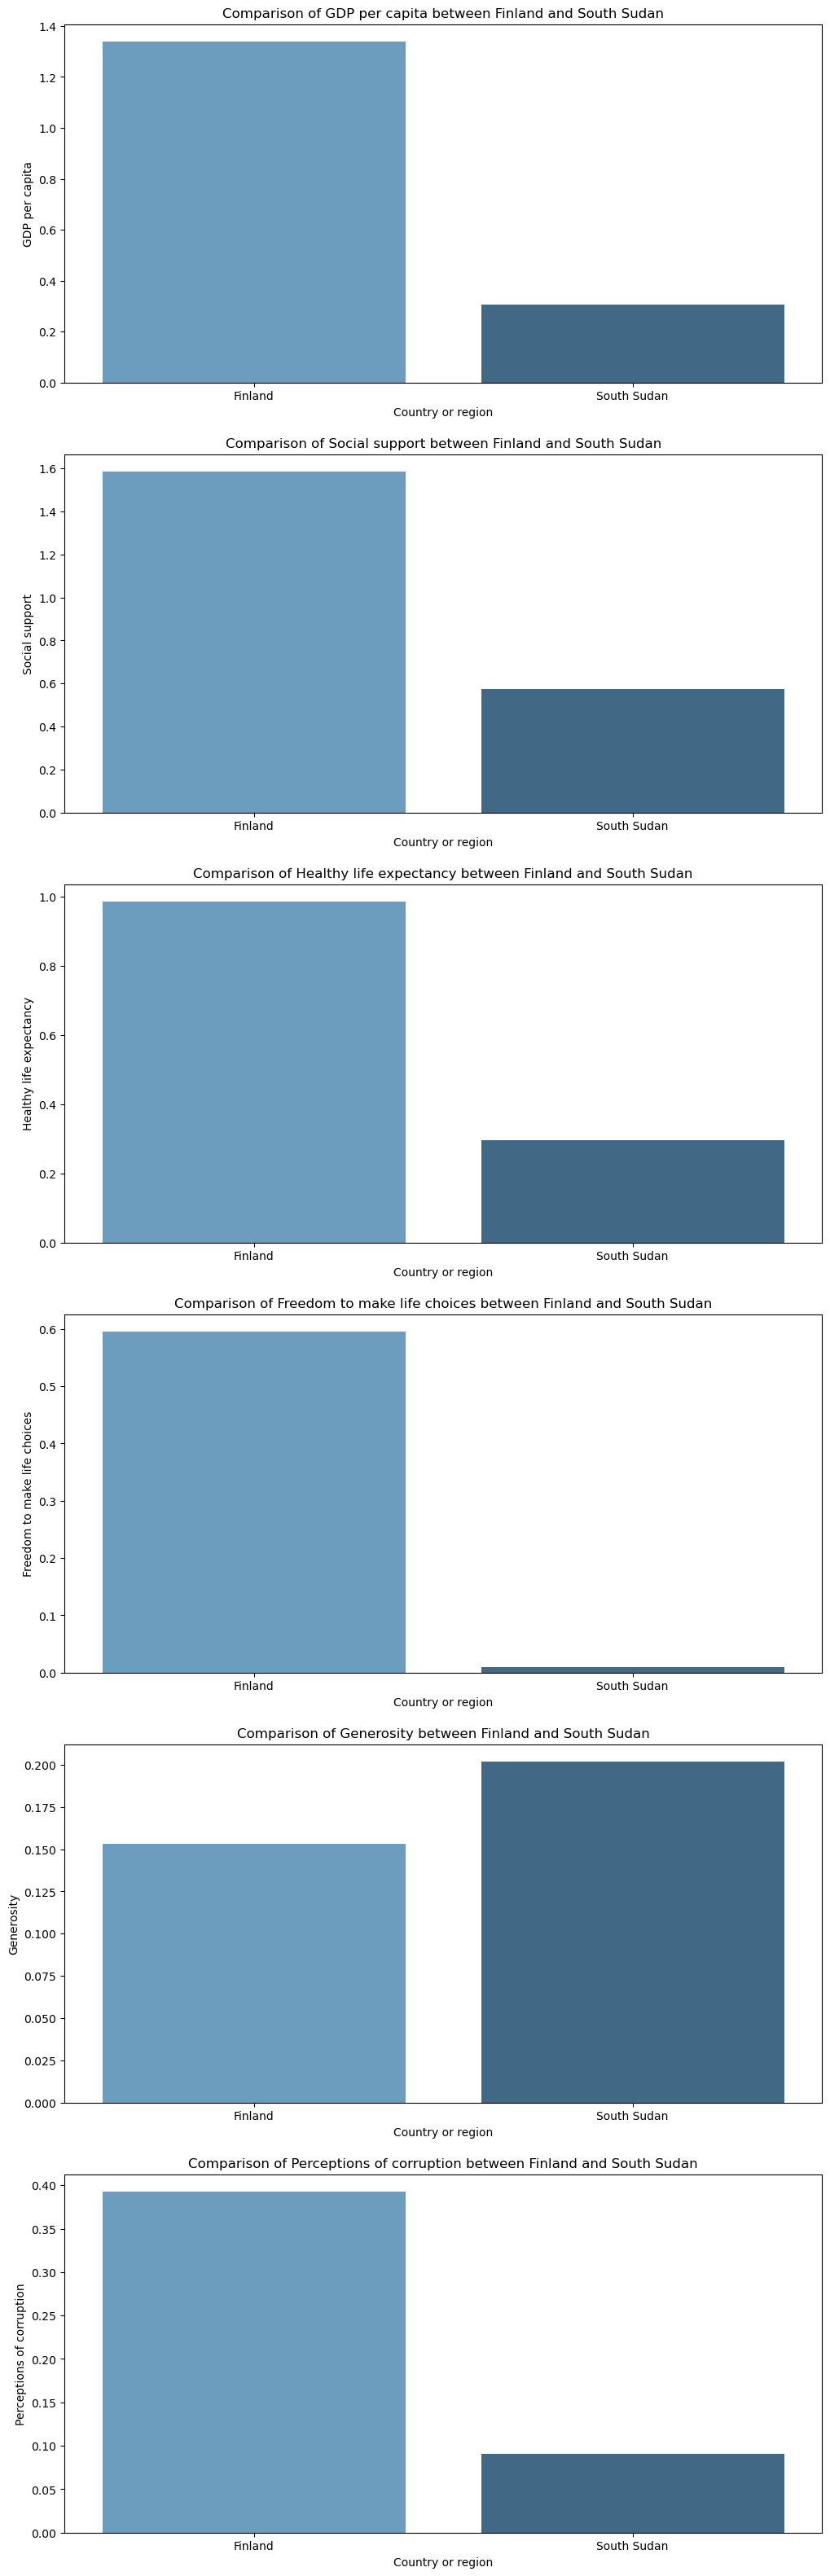

In [13]:
variables = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Criando subplots
fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(12, 40))

# Plotando cada variável em um subplot
for i, variable in enumerate(variables):
    sns.barplot(x='Country or region', y=variable, data=filter_df, ax=axes[i],palette='Blues_d')
    axes[i].set_title(f'Comparison of {variable} between Finland and South Sudan')

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

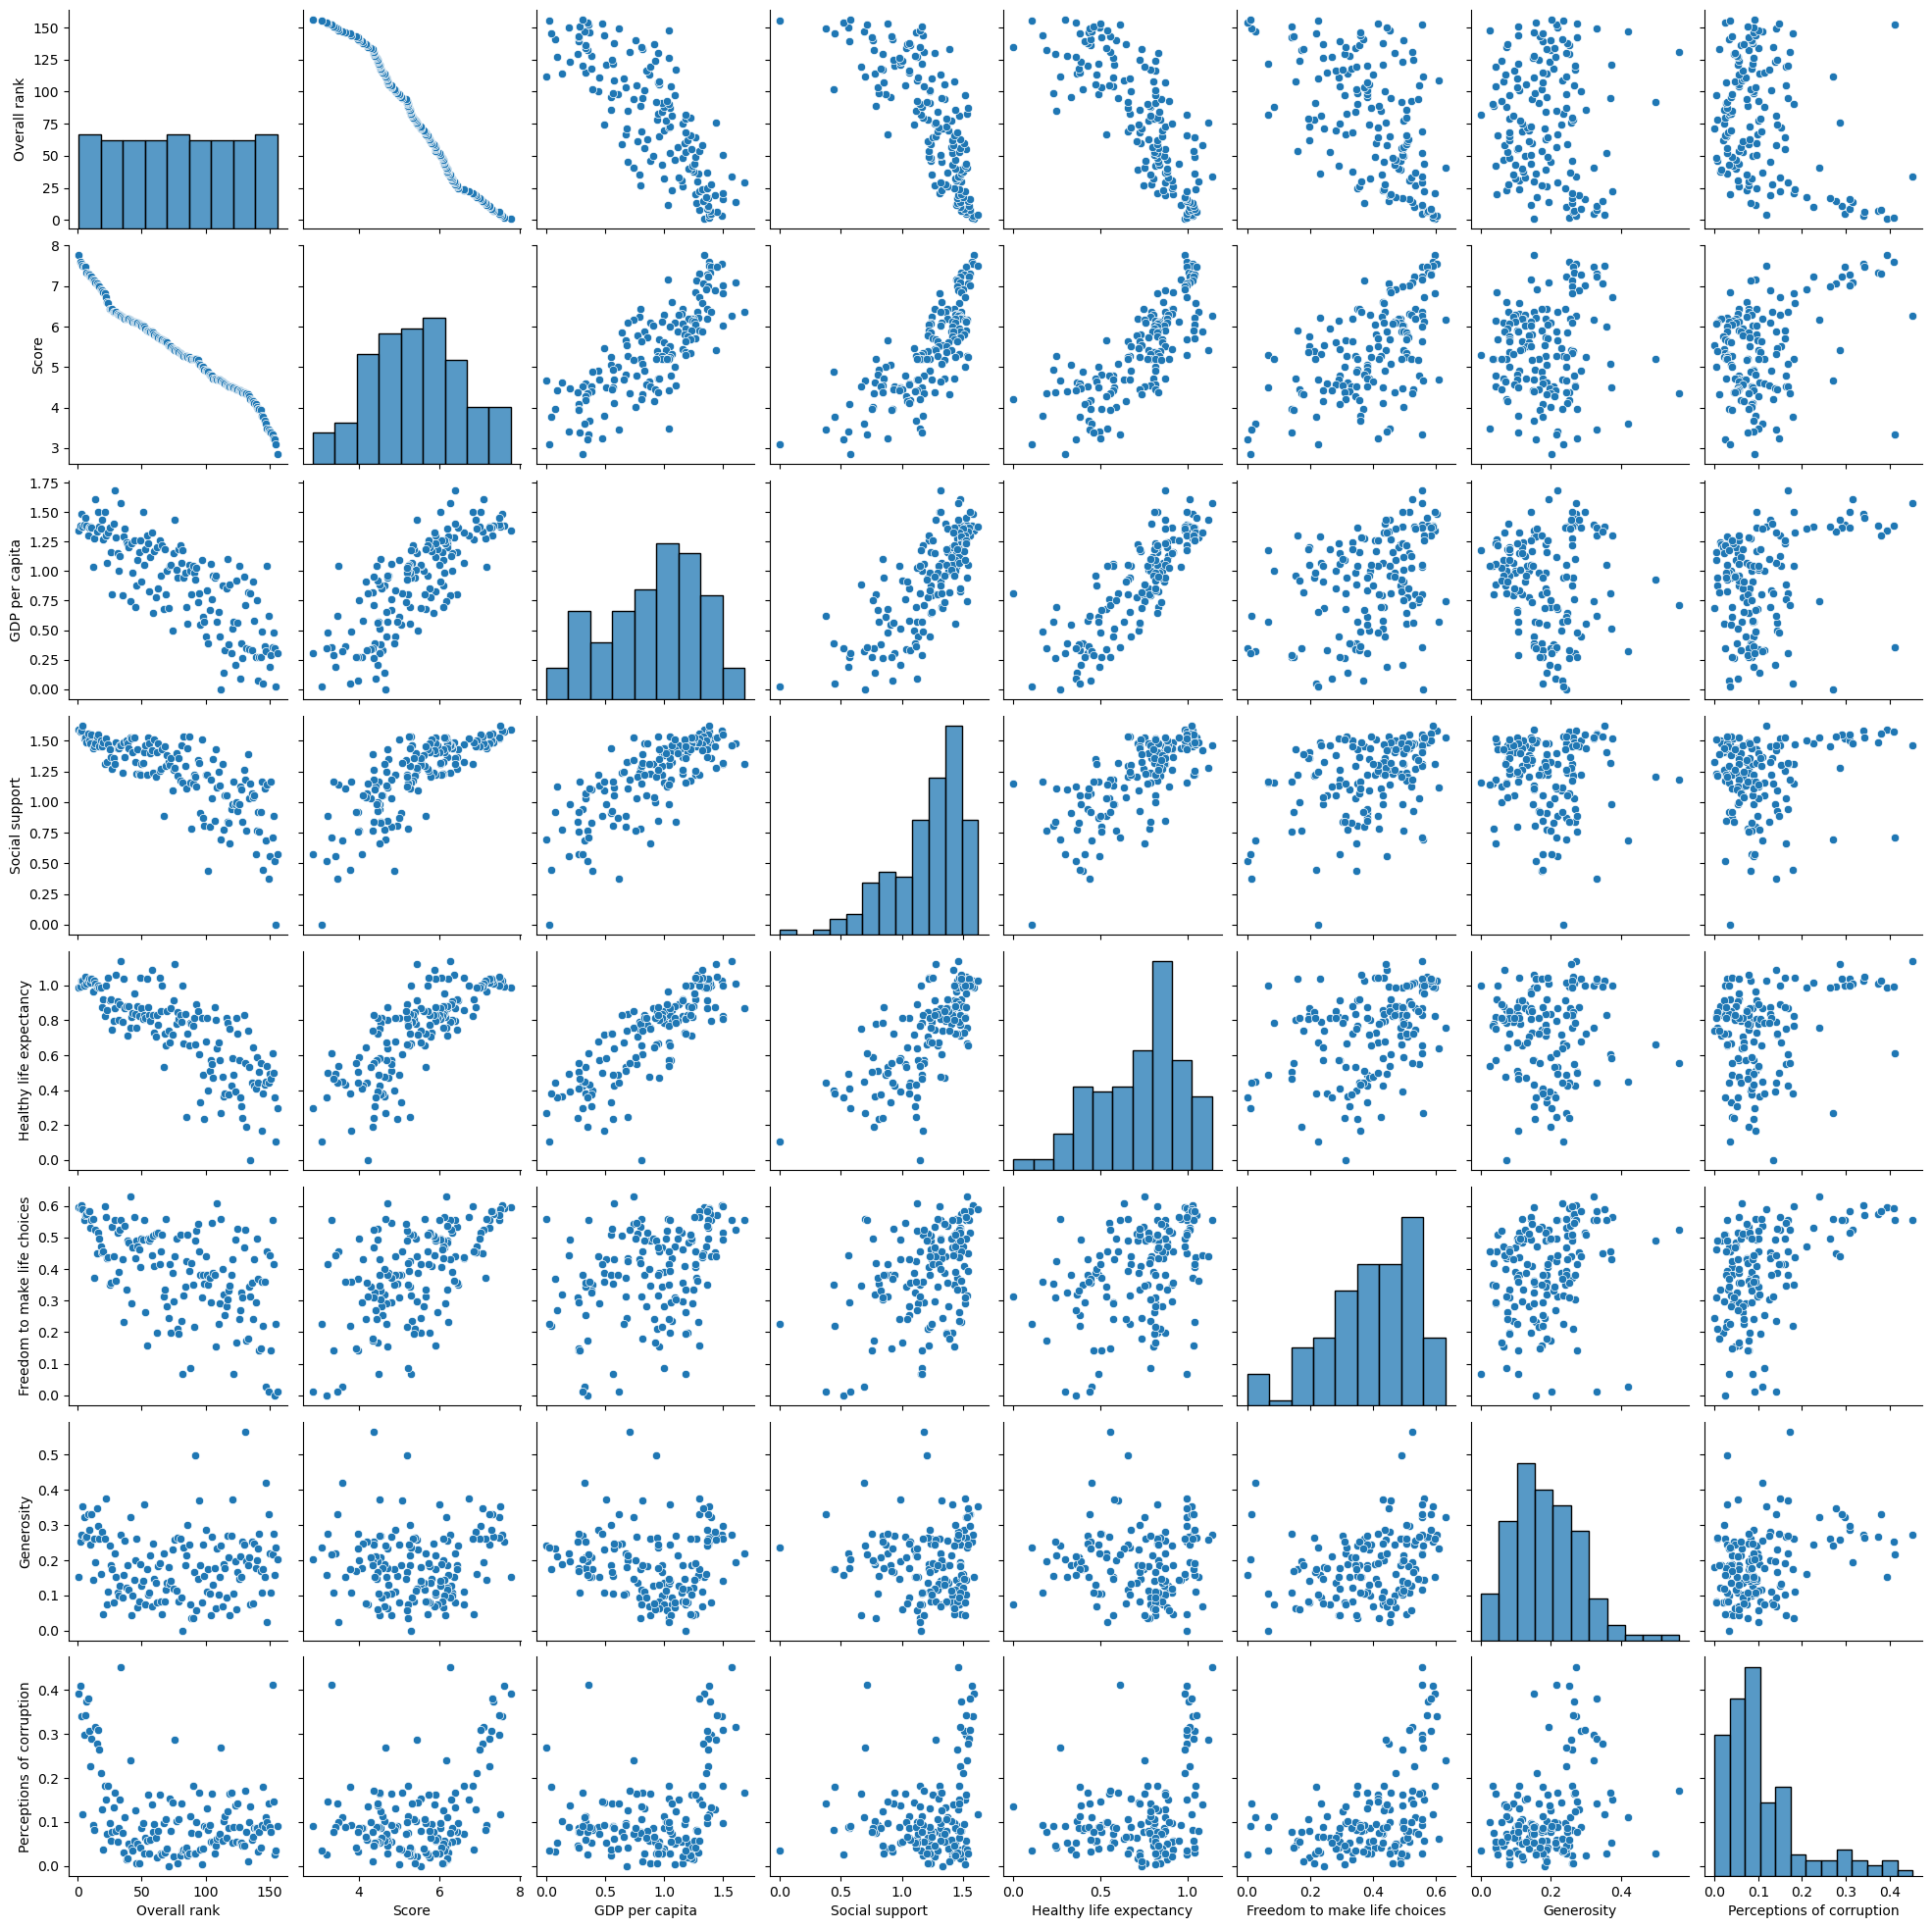

In [14]:
sns.pairplot(df)

In [15]:
df_corr = df[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].corr()

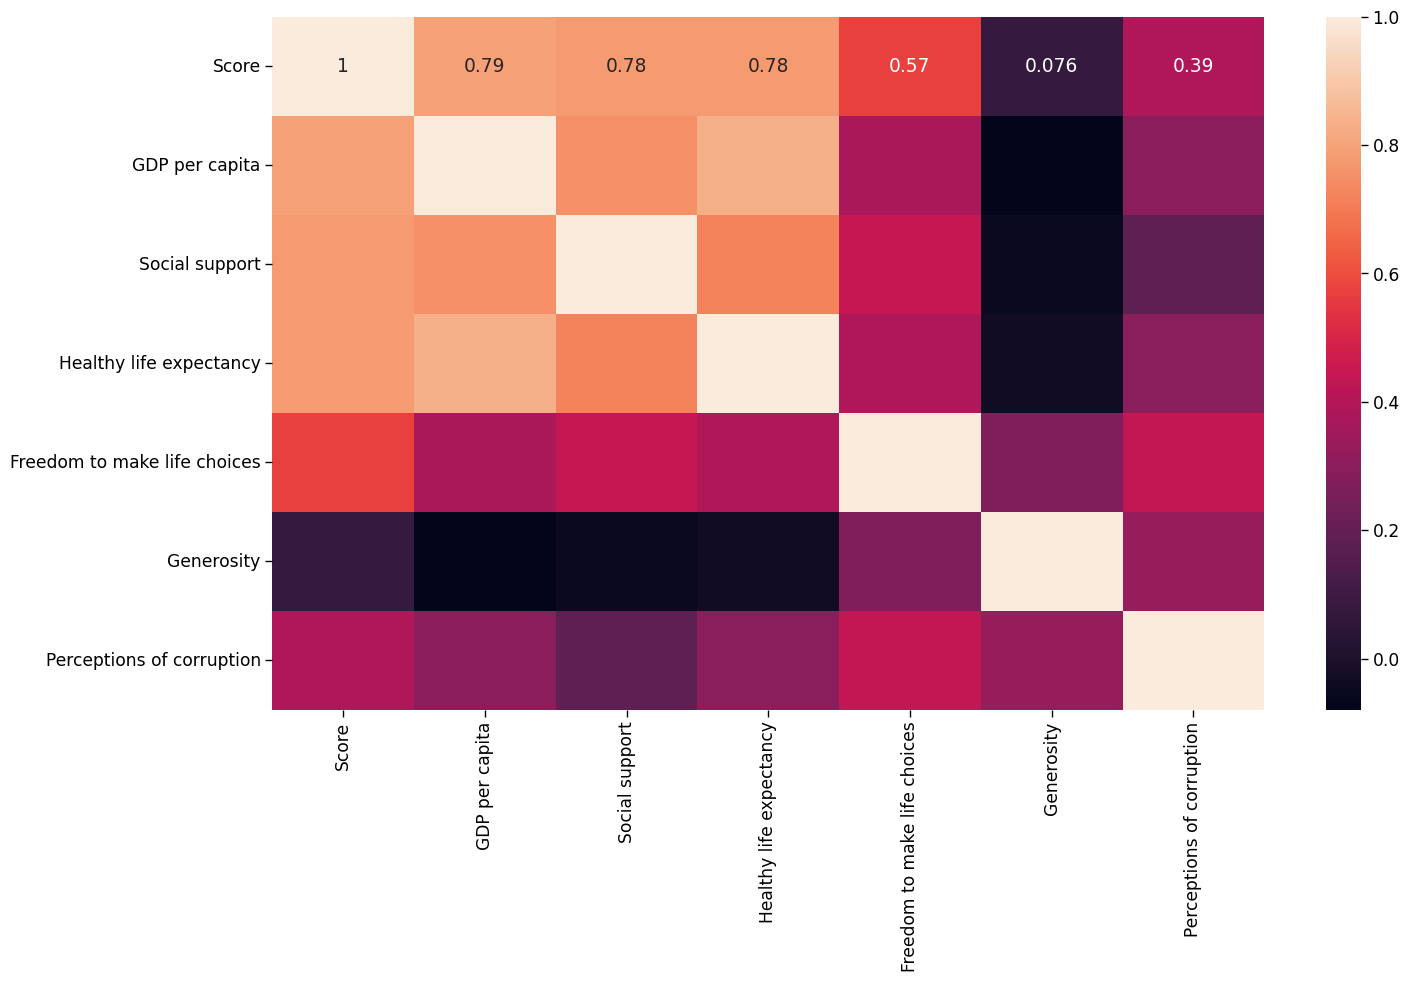

In [16]:
plt.figure(figsize=(16,9))
sns.set_context('paper',font_scale=1.4)
ax = sns.heatmap(df_corr, annot=True)

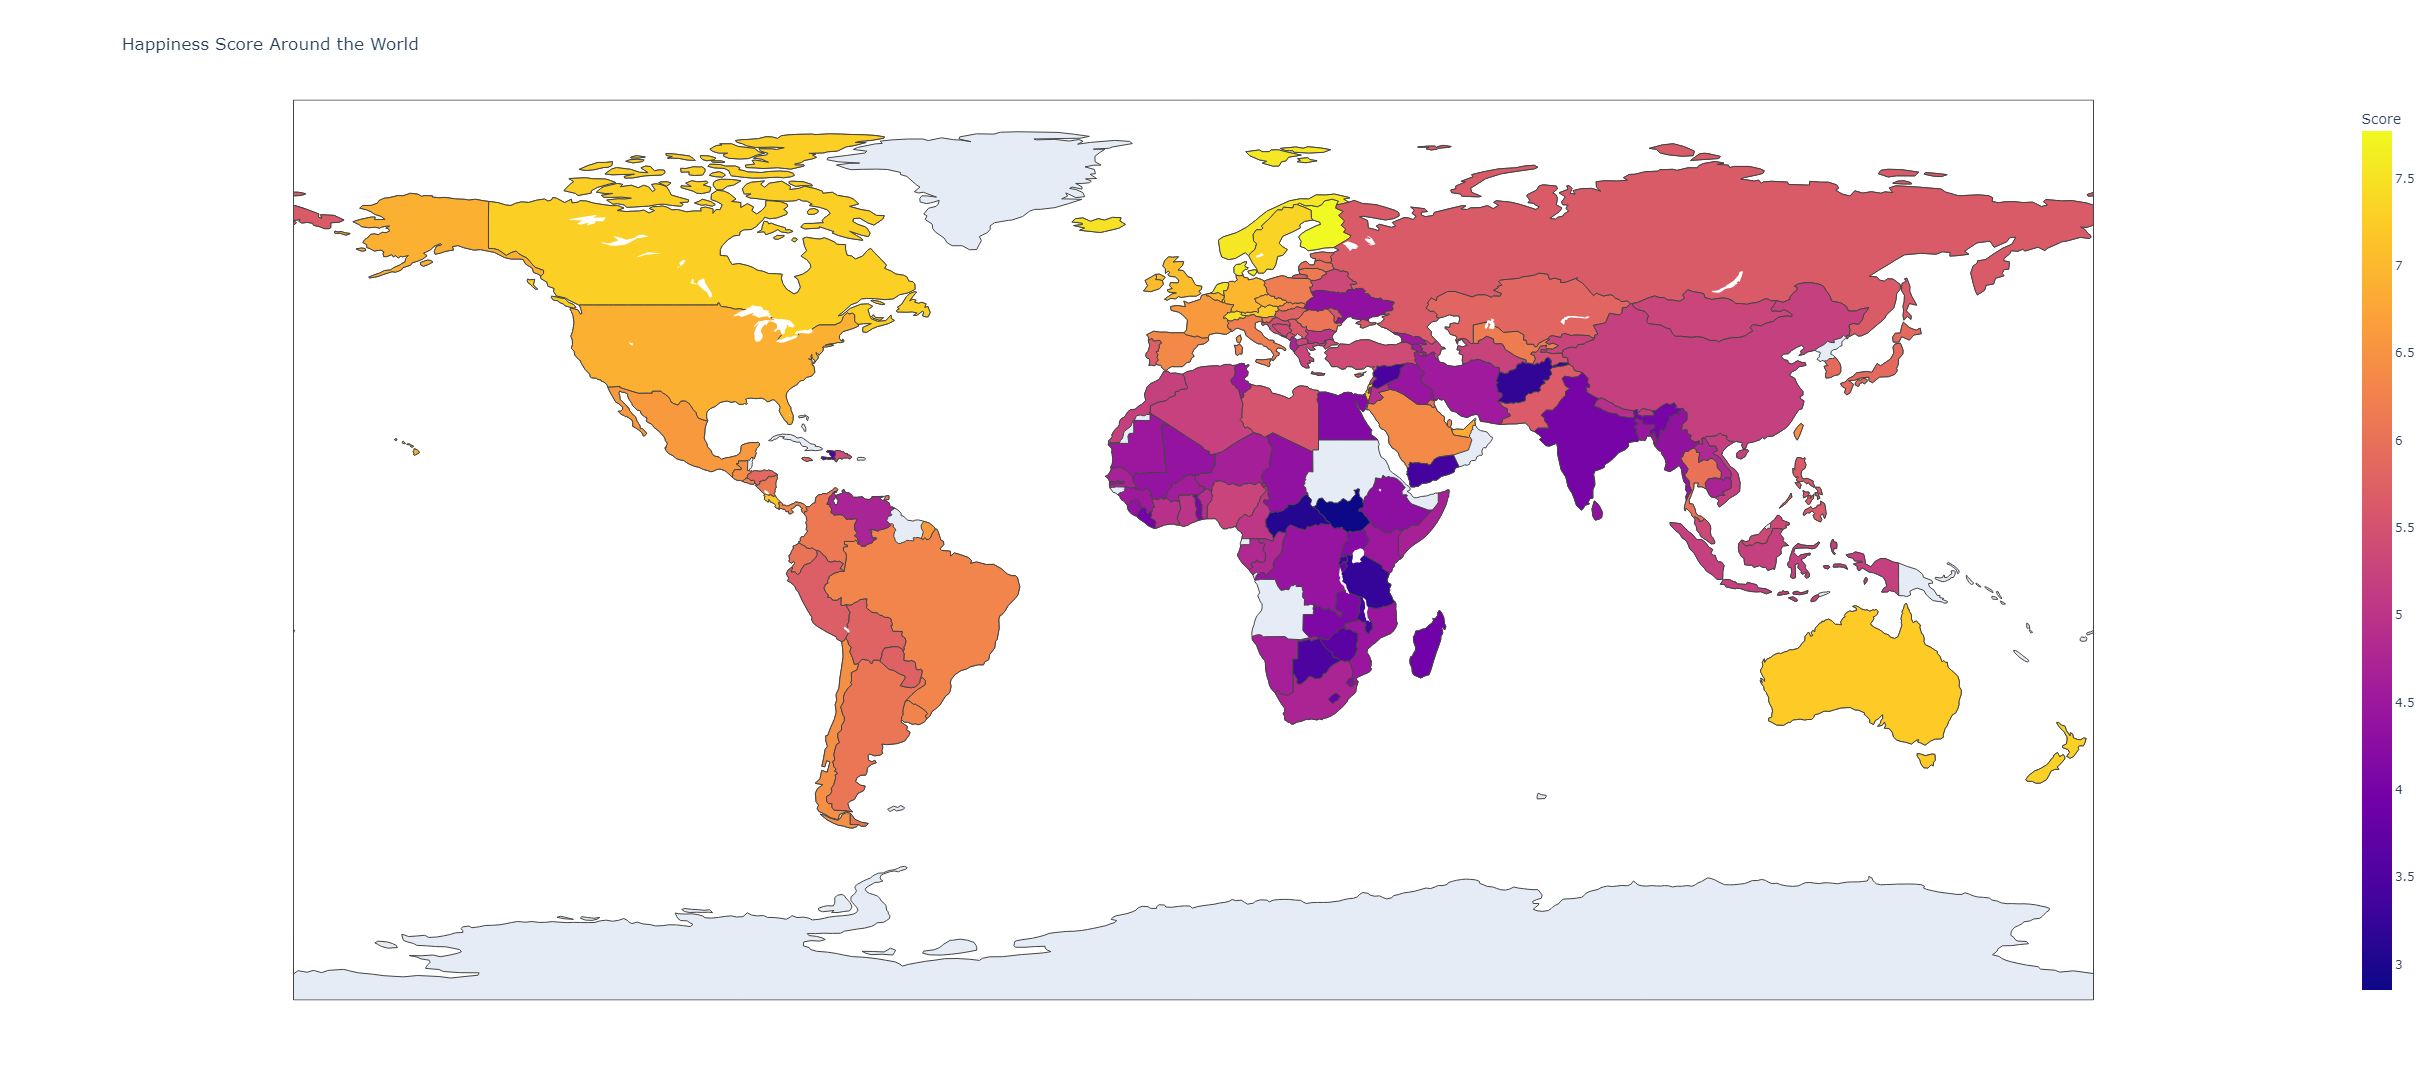

In [17]:
fig = px.choropleth(df,
                    locations='Country or region',
                    locationmode='country names',
                    color='Score',
                    hover_name='Country or region',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Happiness Score Around the World',
                    width=1920, 
                    height=1080)
fig

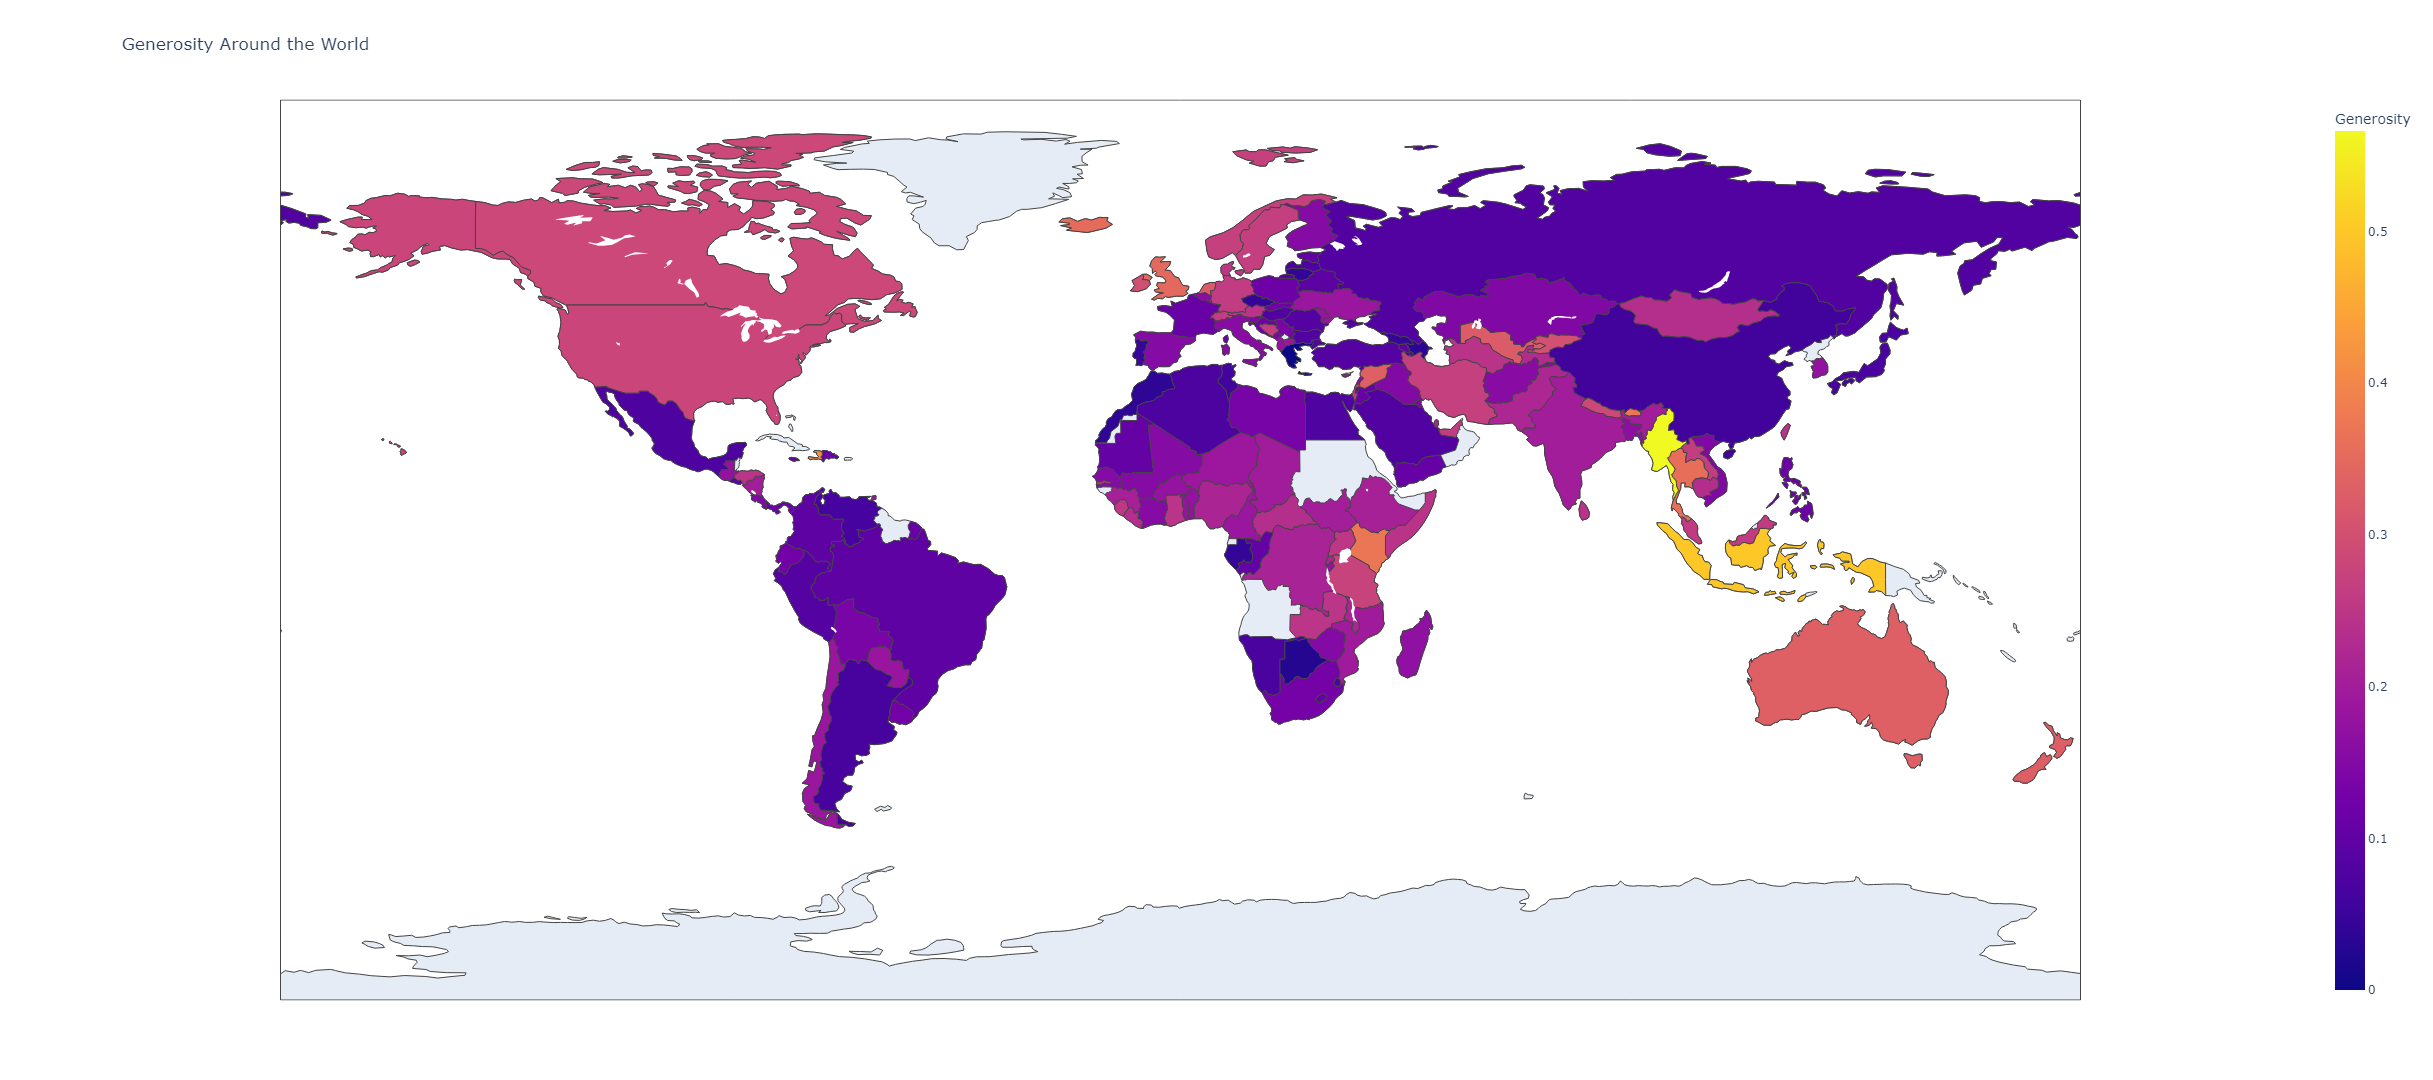

In [18]:
fig = px.choropleth(df,
                    locations='Country or region',
                    locationmode='country names',
                    color='Generosity',
                    hover_name='Country or region',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Generosity Around the World',
                    width=1920, 
                    height=1080)
fig

In [ ]:
df_filtered = df.sort_values(by='Score', ascending=False)
df_filtered_high = df_filtered.iloc[0:50]
df_filtered_low = df_filtered.iloc[-50:]

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\USER\AppData\Local\Temp\ipykernel_1416\2632999421.py:9: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0, 0.5, 'Density')

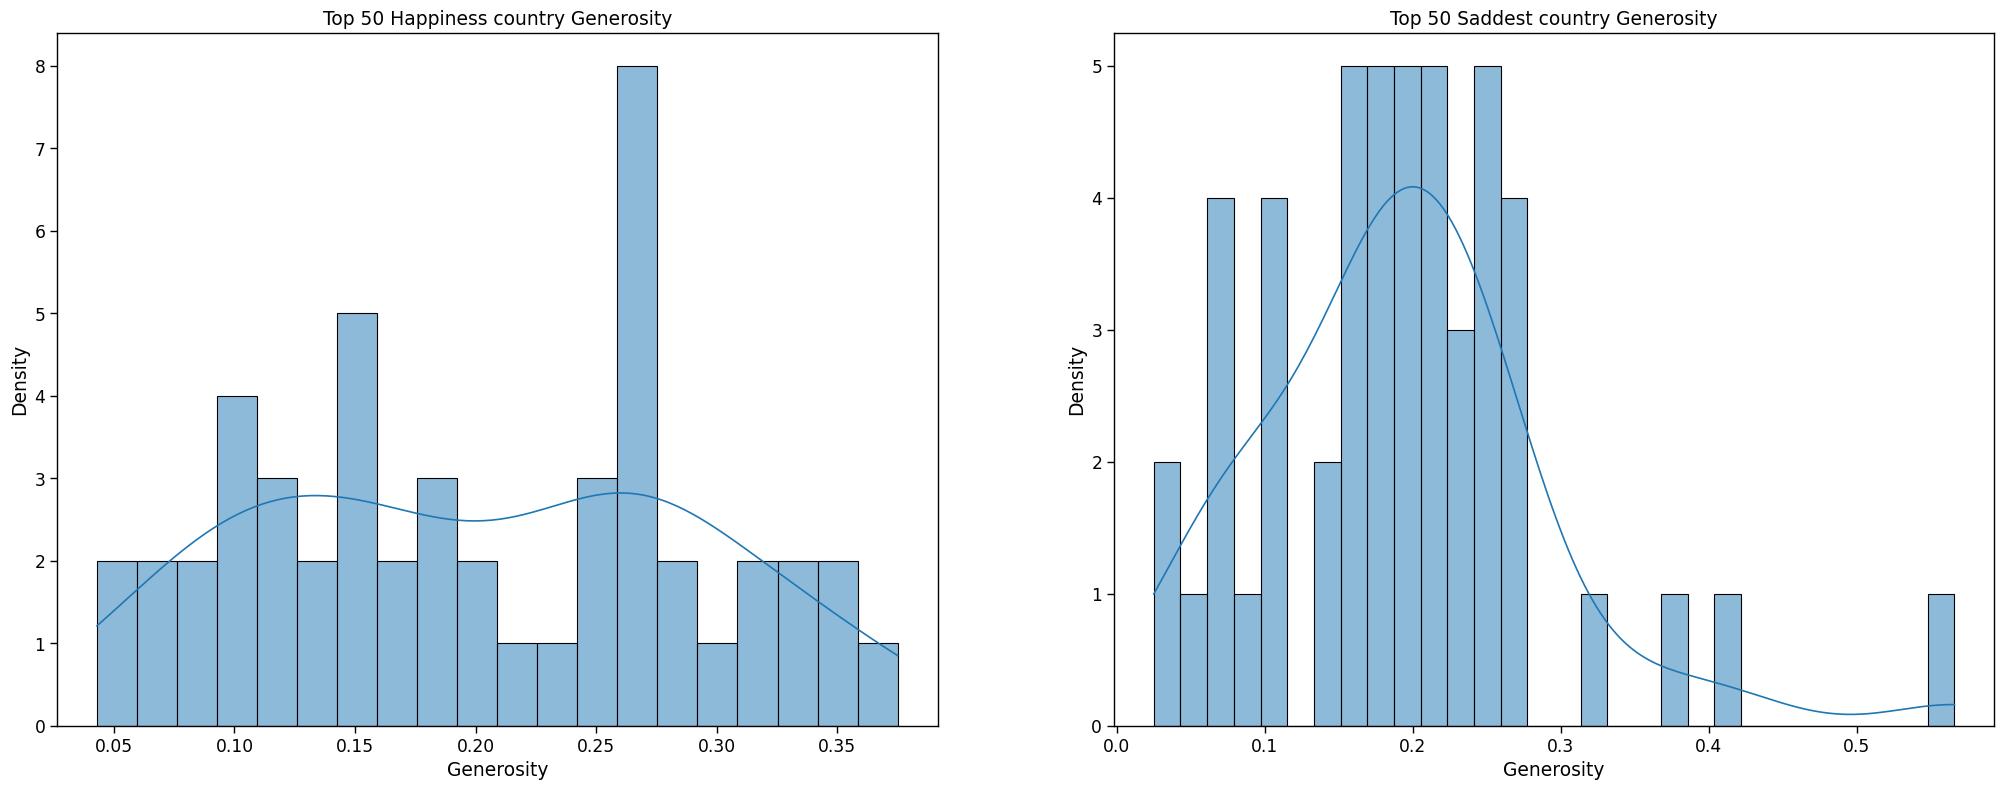

In [20]:
fig, axs = plt.subplots(1,2,figsize=(25,9))
sns.histplot(df_filtered_high['Generosity'], bins=20, kde=True, ax = axs[0])
axs[0].set_title('Top 50 Happiness country Generosity')
axs[0].set_xlabel('Generosity')
axs[0].set_ylabel('Density')
sns.histplot(df_filtered_low['Generosity'], bins=30, kde=True,palette='Blues_d', ax = axs[1])
axs[1].set_title('Top 50 Saddest country Generosity')
axs[1].set_xlabel('Generosity')
axs[1].set_ylabel('Density')